In [ ]:
!pip install transformers sentencepiece gtts SpeechRecognition pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 147.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.0
    Uninstalling click-8.2.0:
      Successfully uninstalled click-8.2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [gtts]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.


In [ ]:
!pip install pyaudio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyaudio)


In [ ]:
!apt-get update && apt-get install -y portaudio19-dev

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 384 kB in 1s (270 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pac

In [ ]:
!pip install transformers sentencepiece gtts SpeechRecognition pydub
!apt-get update && apt-get install -y portaudio19-dev
!pip install pyaudio

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!pip install transformers sentencepiece gtts SpeechRecognition pydub
!pip install pyaudio

  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyaudio)


In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 25.8 MB/s eta 0:00:00


In [22]:
from gtts import gTTS
from pydub import AudioSegment
import speech_recognition as sr
from transformers import MarianMTModel, MarianTokenizer
from IPython.display import Audio, display
import tempfile

In [23]:
english_text = "Good morning! How are you? Did you eat food? Hope you will have a nice day today."

In [24]:
mp3_path = "english_sample.mp3"
tts = gTTS(english_text, lang="en")
tts.save(mp3_path)

In [25]:
wav_path = "english_sample.wav"
audio = AudioSegment.from_file(mp3_path, format="mp3")
audio.export(wav_path, format="wav", codec="pcm_s16le")
print(f"English speech WAV saved at {wav_path}")

English speech WAV saved at english_sample.wav


In [ ]:
cwav_path = "english_sample.wav"
audio = AudioSegment.from_file(mp3_path, format="mp3")
audio.export(wav_path, format="wav", codec="pcm_s16le")
print(f"English speech WAV saved at {wav_path}")

English speech WAV saved at english_sample.wav


In [ ]:
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [ ]:
def translate(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

french_text = translate(recognized_english, tokenizer, model)
print("Translated French text:", french_text)

Translated French text: Bonjour comment êtes-vous avez-vous mangé de la nourriture en espérant que vous aurez une belle journée aujourd'hui


In [ ]:
tts_french = gTTS(french_text, lang='fr')
with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as fp:
    tts_french.save(fp.name)
    print("Playing French audio...")
    display(Audio(fp.name, autoplay=True))


Playing French audio...


In [16]:
!pip install gradio gtts pydub SpeechRecognition transformers torch nltk jiwer matplotlib numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00


In [18]:
!pip install pipwin
!pip win install pyaudio

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.3 MB/s eta 0:00:00
  Created wheel for pipwin: filename=pipwin-0.5.2-py2.py3-none-any.whl size=8770 sha256=775cdb510949faa5074466f3a6deb2d8c524305fcbd70dac316815db169379b6
  Stored in directory: /root/.cache/pip/wheels/07/45/2e/51ee464b7c3407327439df34c2fc62f978a1e5084aaf23d201
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bcf94858c95048dc511d0c30b26b7997926e3874dc3b9b23149bc0f6a10d5b2f
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=25982 sha256=4cbf42bd2afb8d4052cb8cd883ef10b1ca19cda17a5c8b787d9a63ada0093b38
  Stored in directory: /root/.cache/pip/wheels/a5/9a/30/1003e89ab4555b81840ca46d361bf184f1e6ad880cae3b62a9
Successfully b

**Gardio Interface Code**

In [48]:
!pip install gradio gTTS pydub SpeechRecognition transformers torch


In [21]:


import os
import tempfile

import gradio as gr
from gtts import gTTS
from pydub import AudioSegment
import speech_recognition as sr
from transformers import MarianMTModel, MarianTokenizer


MODEL_NAME = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(MODEL_NAME)
model = MarianMTModel.from_pretrained(MODEL_NAME)

recognizer = sr.Recognizer()


def translate_en_fr(text: str) -> str:
    """Translate English text to French using MarianMT."""
    if not text:
        return ""
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    translated_tokens = model.generate(**inputs)
    french_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return french_text



def speech_to_speech(audio_path: str):
    """
    Convert incoming English speech (WAV/MP3/OGG, etc.) to French speech.

    Returns:
        french_audio_path (str): Path to generated French speech (.mp3)
        recognized_en (str):  Recognized English transcript
        translated_fr (str):  Translated French text
    """
    if audio_path is None:
        return None, "", ""


    try:
        sound = AudioSegment.from_file(audio_path)
    except Exception as e:
        return None, "", f"Error reading audio file: {e}"

    with tempfile.NamedTemporaryFile(delete=False, suffix=".wav") as wav_tmp:
        wav_path = wav_tmp.name
        sound.export(wav_path, format="wav", codec="pcm_s16le")

    try:
        with sr.AudioFile(wav_path) as source:
            audio_data = recognizer.record(source)
        recognized_en = recognizer.recognize_google(audio_data)
    except sr.UnknownValueError:
        os.remove(wav_path)
        return None, "", "Sorry – I couldn't understand the speech."
    except sr.RequestError as e:
        os.remove(wav_path)
        return None, "", f"Speech recognition service error: {e}"

    translated_fr = translate_en_fr(recognized_en)


    tts = gTTS(translated_fr, lang="fr")
    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as mp3_tmp:
        tts.save(mp3_tmp.name)
        french_audio_path = mp3_tmp.name


    os.remove(wav_path)

    return french_audio_path, recognized_en, translated_fr




demo = gr.Interface(
    fn=speech_to_speech,
    inputs=gr.Audio(
        sources=["microphone", "upload"],
        type="filepath",
        label="Speak in English or upload an audio file",
    ),
    outputs=[
        gr.Audio(type="filepath", label="French Speech Output"),
        gr.Textbox(label="Recognized English Text"),
        gr.Textbox(label="Translated French Text"),
    ],
    title="English ➡️ French – Speech to Speech Translator",
    description="Record or upload English speech; the app transcribes it, translates it to French, and plays back the translated speech.",
    allow_flagging="never",
)


if __name__ == "__main__":

    demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86511d5821217c9bf4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Error Rate**

In [26]:
from gtts import gTTS
from pydub import AudioSegment
import speech_recognition as sr
from transformers import MarianMTModel, MarianTokenizer
from IPython.display import Audio, display
import tempfile
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from jiwer import wer, mer, wil
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
import nltk
from tqdm import tqdm

In [27]:
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

True

In [28]:
english_examples = [
    "Good morning! How are you? Did you eat food? Hope you will have a nice day today.",
    "The weather is beautiful outside. I think I'll go for a walk in the park.",
    "Could you please tell me how to get to the nearest train station?",
    "I need to schedule an appointment with my doctor for next Tuesday.",
    "My favorite book is about a detective who solves mysteries in a small town.",
    "The conference will be held on May 25th at the Grand Hotel downtown.",
    "Scientists have discovered a new species of butterfly in the Amazon rainforest.",
    "Can you recommend a good restaurant that serves vegetarian food?",
    "The company announced a 15% increase in profits for the first quarter.",
    "I'm planning to take a vacation to France next summer with my family.",
    "The children are playing soccer in the backyard with their friends.",
    "Please remember to turn off the lights before you leave the house.",
    "The museum is open from 9 AM to 5 PM from Tuesday through Sunday.",
    "She has been studying French for three years and can speak it fluently.",
    "The car needs to be taken to the mechanic for its annual inspection.",
    "Do you know what time the concert starts tomorrow evening?",
    "The new smartphone features a better camera and longer battery life.",
    "I would like to exchange this shirt for a different size, please.",
    "The recipe calls for two cups of flour and one teaspoon of salt.",
    "We should plant more trees to help combat climate change."
]

In [29]:
print("Loading translation model...")
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

Loading translation model...


In [30]:
def translate(text, tokenizer, model):
    """Translate text from English to French"""
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    translated = model.generate(**inputs)
    return tokenizer.decode(translated[0], skip_special_tokens=True)

def levenshtein_distance(str1, str2):
    """Calculate the Levenshtein distance between two strings."""
    m, n = len(str1), len(str2)
    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]

    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j

    for i in range(1, m+1):
        for j in range(1, n+1):
            cost = 0 if str1[i-1] == str2[j-1] else 1
            dp[i][j] = min(dp[i-1][j] + 1,
                           dp[i][j-1] + 1,
                           dp[i-1][j-1] + cost)

    return dp[m][n]

In [31]:
def character_error_rate(reference, hypothesis):
    """Calculate character error rate."""
    if len(reference) == 0:
        return 1.0
    edits = levenshtein_distance(reference, hypothesis)
    return edits / len(reference)


temp_dir = tempfile.mkdtemp()
print(f"Created temporary directory for audio files: {temp_dir}")

Created temporary directory for audio files: /tmp/tmpnauy3phf


In [32]:

results = []


print("Processing 20 examples...")
for i, english_text in enumerate(tqdm(english_examples)):
    example_results = {
        'example_id': i + 1,
        'original_english': english_text
    }

    try:

        mp3_path = os.path.join(temp_dir, f"english_{i}.mp3")
        wav_path = os.path.join(temp_dir, f"english_{i}.wav")

        tts = gTTS(english_text, lang="en")
        tts.save(mp3_path)

        audio = AudioSegment.from_file(mp3_path, format="mp3")
        audio.export(wav_path, format="wav", codec="pcm_s16le")


        recognizer = sr.Recognizer()
        with sr.AudioFile(wav_path) as source:
            audio_data = recognizer.record(source)
            try:
                recognized_english = recognizer.recognize_google(audio_data)
                example_results['recognized_english'] = recognized_english
            except (sr.UnknownValueError, sr.RequestError) as e:
                example_results['recognized_english'] = "RECOGNITION_ERROR"
                example_results['error'] = str(e)
                results.append(example_results)
                continue


        french_text = translate(recognized_english, tokenizer, model)
        example_results['translated_french'] = french_text


        ground_truth_french = translate(english_text, tokenizer, model)
        example_results['ground_truth_french'] = ground_truth_french


        example_results['wer'] = wer(english_text, recognized_english)
        example_results['mer'] = mer(english_text, recognized_english)
        example_results['wil'] = wil(english_text, recognized_english)


        reference = [ground_truth_french.split()]
        candidate = french_text.split()
        example_results['bleu'] = sentence_bleu(reference, candidate)
        example_results['meteor'] = meteor_score([ground_truth_french.split()], french_text.split())
        example_results['cer'] = character_error_rate(ground_truth_french, french_text)


        example_results['overall_quality'] = (1 - example_results['wer']) * example_results['bleu']


        results.append(example_results)


        time.sleep(1)

    except Exception as e:
        print(f"Error processing example {i+1}: {str(e)}")
        example_results['error'] = str(e)
        results.append(example_results)


Processing 20 examples...


100%|██████████| 20/20 [01:27<00:00,  4.38s/it]


In [33]:
df = pd.DataFrame(results)

In [34]:
print("\n===== AGGREGATE ERROR STATISTICS =====\n")


===== AGGREGATE ERROR STATISTICS =====



In [35]:
print("SPEECH RECOGNITION METRICS:")
recognition_metrics = ['wer', 'mer', 'wil']
for metric in recognition_metrics:
    if metric in df.columns:
        mean_value = df[metric].mean()
        std_value = df[metric].std()
        print(f"Average {metric.upper()}: {mean_value:.4f} ± {std_value:.4f}")

SPEECH RECOGNITION METRICS:
Average WER: 0.2328 ± 0.1834
Average MER: 0.2328 ± 0.1834
Average WIL: 0.3774 ± 0.1919


In [36]:
print("\nTRANSLATION METRICS:")
translation_metrics = ['bleu', 'meteor', 'cer']
for metric in translation_metrics:
    if metric in df.columns:
        mean_value = df[metric].mean()
        std_value = df[metric].std()
        print(f"Average {metric.upper()}: {mean_value:.4f} ± {std_value:.4f}")


TRANSLATION METRICS:
Average BLEU: 0.6423 ± 0.2456
Average METEOR: 0.8119 ± 0.2056
Average CER: 0.1184 ± 0.1714


In [37]:
if 'overall_quality' in df.columns:
    mean_quality = df['overall_quality'].mean()
    std_quality = df['overall_quality'].std()
    print(f"\nAverage overall quality score: {mean_quality:.4f} ± {std_quality:.4f}")

    # Qualitative assessment
    if mean_quality > 0.8:
        quality_assessment = "Excellent"
    elif mean_quality > 0.6:
        quality_assessment = "Good"
    elif mean_quality > 0.4:
        quality_assessment = "Fair"
    elif mean_quality > 0.2:
        quality_assessment = "Poor"
    else:
        quality_assessment = "Very poor"

    print(f"Overall quality assessment: {quality_assessment}")


Average overall quality score: 0.5266 ± 0.2203
Overall quality assessment: Fair


In [38]:
success_count = len(df[~df['recognized_english'].str.contains("RECOGNITION_ERROR", na=False)])
success_rate = success_count / len(df) * 100
print(f"\nSuccess rate: {success_count}/{len(df)} examples ({success_rate:.1f}%)")


Success rate: 20/20 examples (100.0%)


In [39]:
csv_path = "speech_translation_results.csv"
df.to_csv(csv_path, index=False)
print(f"\nDetailed results saved to: {csv_path}")

# Create visualizations
plt.figure(figsize=(15, 10))



Detailed results saved to: speech_translation_results.csv


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

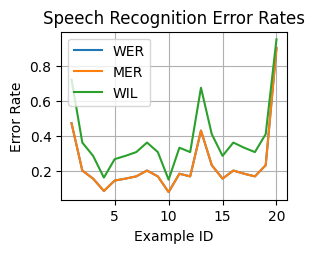

In [40]:
plt.subplot(2, 2, 1)
for metric in recognition_metrics:
    if metric in df.columns:
        plt.plot(range(1, len(df) + 1), df[metric], label=metric.upper())
plt.xlabel('Example ID')
plt.ylabel('Error Rate')
plt.title('Speech Recognition Error Rates')
plt.legend()
plt.grid(True)

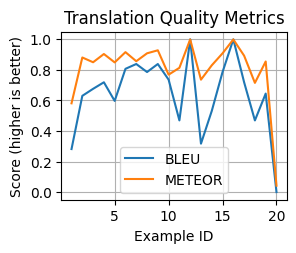

In [41]:
plt.subplot(2, 2, 2)
for metric in ['bleu', 'meteor']:
    if metric in df.columns:
        plt.plot(range(1, len(df) + 1), df[metric], label=metric.upper())
plt.xlabel('Example ID')
plt.ylabel('Score (higher is better)')
plt.title('Translation Quality Metrics')
plt.legend()
plt.grid(True)

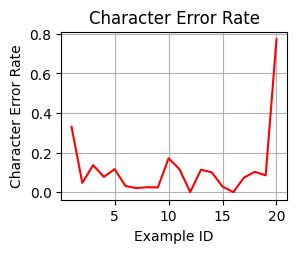

In [42]:
if 'cer' in df.columns:
    plt.subplot(2, 2, 3)
    plt.plot(range(1, len(df) + 1), df['cer'], color='red')
    plt.xlabel('Example ID')
    plt.ylabel('Character Error Rate')
    plt.title('Character Error Rate')
    plt.grid(True)

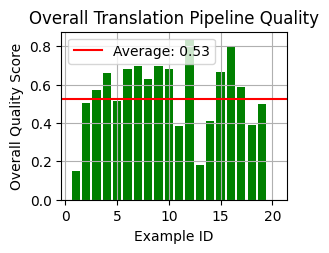

In [43]:
if 'overall_quality' in df.columns:
    plt.subplot(2, 2, 4)
    plt.bar(range(1, len(df) + 1), df['overall_quality'], color='green')
    plt.axhline(y=mean_quality, color='r', linestyle='-', label=f'Average: {mean_quality:.2f}')
    plt.xlabel('Example ID')
    plt.ylabel('Overall Quality Score')
    plt.title('Overall Translation Pipeline Quality')
    plt.legend()
    plt.grid(True)

In [44]:
plt.tight_layout()
plt.savefig('speech_translation_metrics.png')
print("Visualizations saved to: speech_translation_metrics.png")

Visualizations saved to: speech_translation_metrics.png


<Figure size 640x480 with 0 Axes>

In [45]:
print("\n===== DETAILED EXAMPLE BREAKDOWN =====\n")
for i, row in df.iterrows():
    example_id = row['example_id']
    if i < 3 or example_id == df['example_id'].max():  # Show first 3 and last examples
        print(f"Example {example_id}:")
        print(f"Original: \"{row['original_english']}\"")
        if 'recognized_english' in row and not pd.isna(row['recognized_english']) and "RECOGNITION_ERROR" not in str(row['recognized_english']):
            print(f"Recognized: \"{row['recognized_english']}\"")
            if 'wer' in row:
                print(f"WER: {row['wer']:.4f}")
            if 'ground_truth_french' in row and 'translated_french' in row:
                print(f"Ground truth: \"{row['ground_truth_french']}\"")
                print(f"Translated: \"{row['translated_french']}\"")
                if 'bleu' in row:
                    print(f"BLEU: {row['bleu']:.4f}")
                if 'overall_quality' in row:
                    print(f"Overall quality: {row['overall_quality']:.4f}")
        else:
            print("Recognition failed for this example")
        print()



===== DETAILED EXAMPLE BREAKDOWN =====

Example 1:
Original: "Good morning! How are you? Did you eat food? Hope you will have a nice day today."
Recognized: "good morning how are you did you eat food hope you will have a nice day today"
WER: 0.4706
Ground truth: "Bonjour! Comment allez-vous? Avez-vous mangé? J'espère que vous aurez une belle journée aujourd'hui."
Translated: "Bonjour comment êtes-vous avez-vous mangé de la nourriture en espérant que vous aurez une belle journée aujourd'hui"
BLEU: 0.2818
Overall quality: 0.1492

Example 2:
Original: "The weather is beautiful outside. I think I'll go for a walk in the park."
Recognized: "the weather is beautiful outside I think I'll go for a walk in the park"
WER: 0.2000
Ground truth: "Le temps est beau dehors. Je pense que je vais aller faire une promenade dans le parc."
Translated: "le temps est beau dehors je pense que je vais aller faire une promenade dans le parc"
BLEU: 0.6302
Overall quality: 0.5042

Example 3:
Original: "Could yo